# Uvod u znanost o podacima (UZOP) - Projekt - Drugi dio
## Student: Borna Rebić Taučer
## JMBAG:0036526910

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Učitavanje podataka

In [ ]:
df = pd.read_csv("heart_disease_uci.csv", index_col=False)
df.head(8)

Stupac sex
sex
Female    194
Male      726
Name: sex, dtype: int64
-----------
Stupac dataset
dataset
Cleveland        304
Hungary          293
Switzerland      123
VA Long Beach    200
Name: dataset, dtype: int64
-----------
Stupac cp
cp
asymptomatic       496
atypical angina    174
non-anginal        204
typical angina      46
Name: cp, dtype: int64
-----------
Stupac fbs
fbs
False    692
True     138
Name: fbs, dtype: int64
-----------
Stupac restecg
restecg
lv hypertrophy      188
normal              551
st-t abnormality    179
Name: restecg, dtype: int64
-----------
Stupac exang
exang
False    528
True     337
Name: exang, dtype: int64
-----------
Stupac slope
slope
downsloping     63
flat           345
upsloping      203
Name: slope, dtype: int64
-----------
Stupac thal
thal
fixed defect          46
normal               196
reversable defect    192
Name: thal, dtype: int64
-----------


Brisanje monotonih i konstantnih vrijednosti

In [ ]:
df = df.drop(columns=df.columns[df.nunique() <= 1])
df = df.drop(columns=["id"]) #monotone vrijednosti

df.isna().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Zamjenu nedostajućih vrijednosti

In [ ]:
for col in ["trestbps", "chol", "thalch", "oldpeak"]:
    df[col] = df[col].fillna(df[col].mean())

for col in ["fbs", "restecg", "exang", "slope", "ca", "thal"]:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isna().sum()

/tmp/ipykernel_6009/3481161173.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Transformiranje kategoričkih značajki u numeričke.

In [ ]:
for col in ["sex", "dataset", "cp", "fbs", "restecg", "exang", "slope", "thal"]:
    df[f"{col}_num"] = df[col].astype("category").cat.codes
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,...,thal,num,sex_num,dataset_num,cp_num,fbs_num,restecg_num,exang_num,slope_num,thal_num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,...,fixed defect,0,1,0,3,1,0,0,0,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,...,normal,2,1,0,0,0,0,1,1,1
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,...,reversable defect,1,1,0,0,0,0,1,1,2
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,...,normal,0,1,0,2,0,1,0,0,1
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,...,normal,0,0,0,1,0,0,0,2,1


Statistika numeričkih značajki

In [ ]:
numerical = ["trestbps", "chol", "thalch", "oldpeak"]
df[numerical].describe()

,trestbps,chol,thalch,oldpeak
count,920.000000,920.000000,920.000000,920.000000
mean,132.132404,199.130337,137.545665,0.878788
std,18.443895,108.957634,25.138494,1.053774
min,0.000000,0.000000,60.000000,-2.600000
25%,120.000000,177.750000,120.000000,0.000000
50%,130.000000,221.000000,138.000000,0.800000
75%,140.000000,267.000000,156.000000,1.500000
max,200.000000,603.000000,202.000000,6.200000


In [ ]:
for col in ["sex", "dataset", "cp", "fbs", "restecg", "exang", "slope", "thal"]:
    print(f"Stupac {col}")
    print(df.groupby(col)[col].count())
    print("-----------")

Stupac sex
sex
Female    194
Male      726
Name: sex, dtype: int64
-----------
Stupac dataset
dataset
Cleveland        304
Hungary          293
Switzerland      123
VA Long Beach    200
Name: dataset, dtype: int64
-----------
Stupac cp
cp
asymptomatic       496
atypical angina    174
non-anginal        204
typical angina      46
Name: cp, dtype: int64
-----------
Stupac fbs
fbs
False    782
True     138
Name: fbs, dtype: int64
-----------
Stupac restecg
restecg
lv hypertrophy      188
normal              553
st-t abnormality    179
Name: restecg, dtype: int64
-----------
Stupac exang
exang
False    583
True     337
Name: exang, dtype: int64
-----------
Stupac slope
slope
downsloping     63
flat           654
upsloping      203
Name: slope, dtype: int64
-----------
Stupac thal
thal
fixed defect          46
normal               682
reversable defect    192
Name: thal, dtype: int64
-----------


Normalizacija numeričkih značajki.

In [ ]:
for col in numerical:
        mean = df[col].mean()
        std = df[col].std()
        df[col] = (df[col] - mean) / std
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,...,thal,num,sex_num,dataset_num,cp_num,fbs_num,restecg_num,exang_num,slope_num,thal_num
0,63,Male,Cleveland,typical angina,0.697662,0.310852,True,lv hypertrophy,0.495429,False,...,fixed defect,0,1,0,3,1,0,0,0,0
1,67,Male,Cleveland,asymptomatic,1.510939,0.797279,False,lv hypertrophy,-1.175316,True,...,normal,2,1,0,0,0,0,1,1,1
2,67,Male,Cleveland,asymptomatic,-0.657801,0.274140,False,lv hypertrophy,-0.339943,True,...,reversable defect,1,1,0,0,0,0,1,1,2
3,37,Male,Cleveland,non-anginal,-0.115616,0.466876,False,normal,1.967275,False,...,normal,0,1,0,2,0,1,0,0,1
4,41,Female,Cleveland,atypical angina,-0.115616,0.044693,False,lv hypertrophy,1.370581,False,...,normal,0,0,0,1,0,0,0,2,1


Vizualizacija

Text(0.5, 1.0, 'Toplinska mapa')

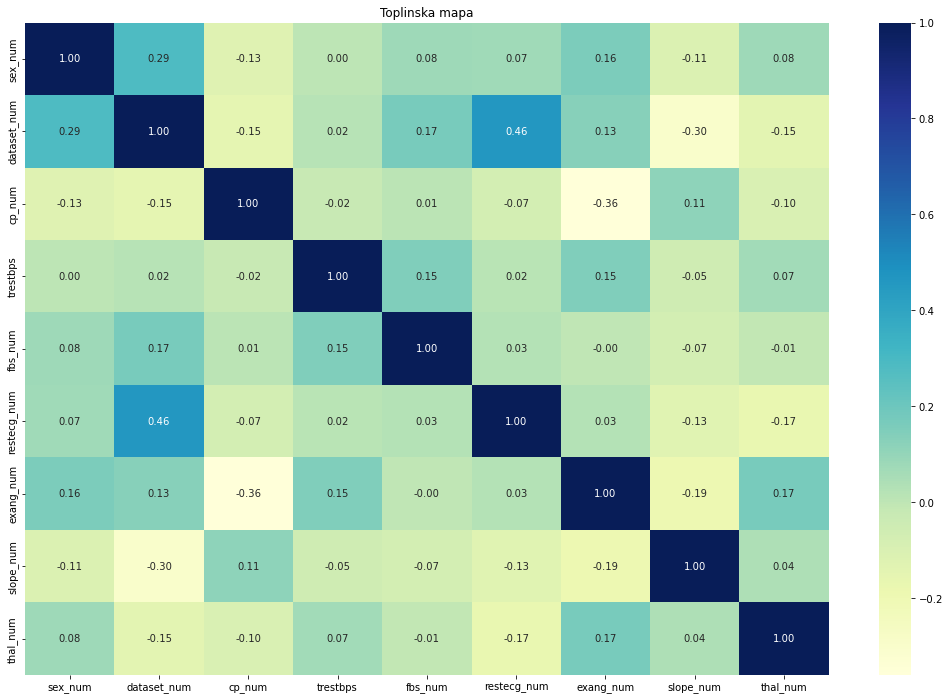

In [ ]:
plt.figure(figsize=(18, 12))
sns.heatmap(df[["sex_num", "dataset_num", "cp_num", "trestbps", "fbs_num", "restecg_num", "exang_num", "slope_num", "thal_num"]].corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Toplinska mapa")

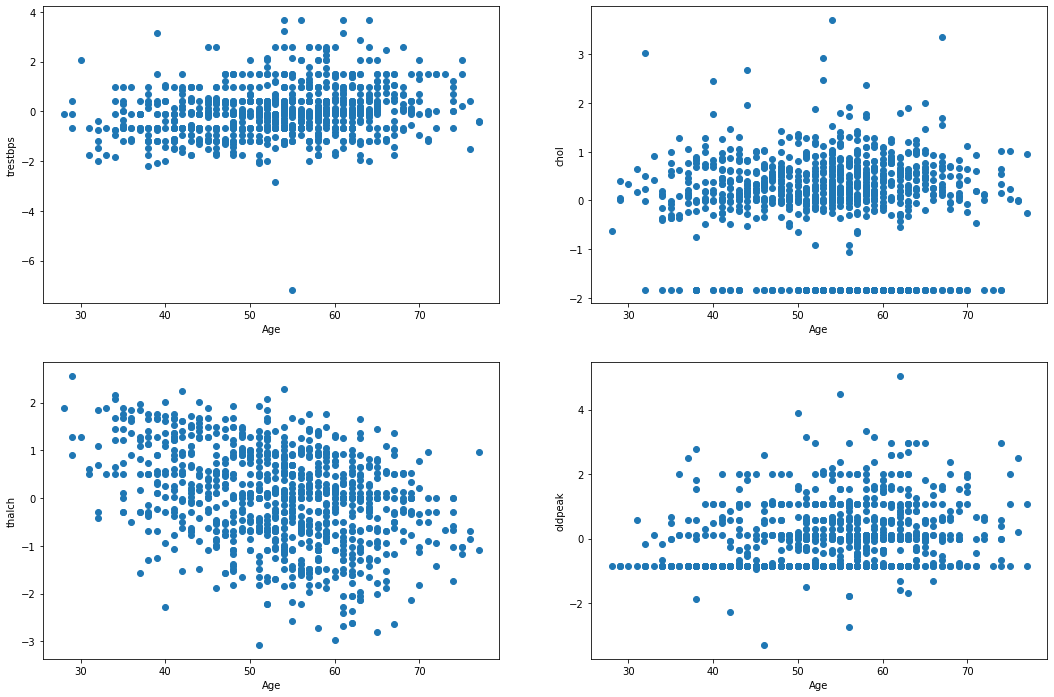

In [69]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical):
    plt.subplot(2,2,i+1)
    plt.xlabel("Age")
    plt.ylabel(col)
    plt.scatter(df["age"], df[col])
plt.show()